In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

class shape_fns:
    def __init__(self, scale_x = [0, 1], scale_y = [0, 1], p=0):
        self.scale_x = scale_x
        self.scale_y = scale_y
        self.x_l = scale_x[0]
        self.x_r = scale_x[1]
        self.y_l = scale_y[0]
        self.y_r = scale_y[1]
        self.p = p
        
    def expression(self, ksi, neta): 
        return 1-ksi-neta
    
    def __call__(self, x, y):
        x = np.asarray(x)  # convert x to a numpy array if it's not already
        y = np.asarray(y)  # convert y to a numpy array if it's not already
        expression_vectorized = np.vectorize(self.expression, otypes=['d'])
        return np.where((self.x_l <= x) & (x <= self.x_r) & (self.y_l <= y) & (y <= self.y_r), expression_vectorized(x, y), 0)


In [6]:
shape_fn = shape_fns()
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
shape_fn(x, y)

array([ 1.        ,  0.77777778,  0.55555556,  0.33333333,  0.11111111,
       -0.11111111, -0.33333333, -0.55555556, -0.77777778, -1.        ])

In [12]:
# compute Jacobian matrix
def jacobian(X, dN):
    # X is the global coordinate for each node.
    # dN is the local coordinate of the phip

    # compute Jacobian matrix
    J = np.dot(np.transpose(X),dN)
    return np.linalg.inv(J), np.linalg.det(J)
X = [[0, 0], [1, 2], [2, 2]]
dN = [[0, 0], [0, 1], [1, 0]]
jacobian(X, dN)

(array([[ 1. , -0.5],
        [-1. ,  1. ]]),
 2.0)

In [1]:
import sympy as sym
import numpy as np
from sympy.matrices import Matrix

# 定义三角形三个顶点的原始坐标 (x0, y0), (x1, y1), (x2, y2)
x0, x1, x2, y0, y1, y2 = sym.symbols(['x_0', 'x_1', 'x_2', 'y_0', 'y_1', 'y_2'])


[x0, y0], [x1, y1], [x2, y2] = [[0, 0], [2, 1], [0.5, 2]]
[x0, y0], [x1, y1], [x2, y2] = [[1, 0.9], [2, 1.3], [0.5, 1.7]]
[x0, y0], [x1, y1], [x2, y2] = [[16.45327476, 25.20273424], [23.90255057, 19.62681142], [24.7911839 , 27.45556408]]


# 定义等参映射的雅可比矩阵
J = Matrix([[x1-x0, y1-y0], 
            [x2-x0, y2-y0]])

# 等腰直角等参单元的坐标 (eta, zeta)
eta, zeta = sym.symbols(['\eta', '\zeta'])
# eta, zeta = [1, 1]
u0 = 1 - eta - zeta
u1 = eta
u2 = zeta

# 对每个顶点计算 [du/deta, du/dzeta]
du = Matrix([[sym.diff(u0, eta),sym.diff(u1, eta),sym.diff(u2, eta)],
[sym.diff(u0, zeta), sym.diff(u1, zeta), sym.diff(u2, zeta)]])

# 对每个顶点，计算 du/dx, du/dy = J^{-1} * [du/deta, du/dzeta]
def deriv_u(): 
    return sym.simplify(J.inv() * du)

# 计算第 e 个单元的 9 个非零矩阵元；省略前面的因子 1/2|J|
Ke = sym.zeros(3,3)
du_ =  deriv_u() * J.det()
for i in range(3):
    for j in range(3):
        Ke[i, j] = du_[:, i].dot(du_[:, j])
Ke        

Matrix([
[62.0790374066439, -25.046191566743, -37.032845839901],
[-25.046191566743,   74.59597111489, -49.549779548147],
[-37.032845839901, -49.549779548147, 86.5826253880479]])

In [97]:
import numpy as np

# 定义一个 2x2 矩阵
matrix = np.array([[4, 7], [2, 6]])

# 计算其逆矩阵
matrix_inverse = np.linalg.inv(matrix)

print(matrix_inverse)


[[ 0.6 -0.7]
 [-0.2  0.4]]


In [105]:
du

Matrix([
[-1, 1, 0],
[-1, 0, 1]])

In [106]:
J

Matrix([
[  2, 1],
[0.5, 2]])

In [110]:
J.inv()*J.det()

Matrix([
[ 2.0, -1.0],
[-0.5,  2.0]])

In [108]:
J.det()

3.50000000000000

In [5]:
import sympy as sp
ksi, neta = sp.symbols('xi eta')
z = (1-ksi)*(1-neta)/4
z

(1 - eta)*(1 - xi)/4

In [16]:
class shape_fns:
    def __init__(self, scale_x = [0, 1], scale_y = [0, 1]):
        self.scale_x = scale_x
        self.scale_y = scale_y
        self.x_l = scale_x[0]
        self.x_r = scale_x[1]
        self.y_l = scale_y[0]
        self.y_r = scale_y[1]

    def expression(self, ksi, neta):
        pass  # 这里是你的表达式，具体内容需要你根据需求来填写

    def __call__(self, x, y):
        x = np.asarray(x)  # convert x to a numpy array if it's not already
        y = np.asarray(y)  # convert y to a numpy array if it's not already
        expression_vectorized = np.vectorize(self.expression, otypes=['d'])
        return np.where((self.x_l <= x) & (x <= self.x_r) & (self.y_l <= y) & (y <= self.y_r), expression_vectorized(x, y), 0)

class T3_phi(shape_fns):
    def expression(self, ksi, neta): 
        return ksi + 2 * neta  # 假设你的函数是 ksi + 2 * neta

    def derivative_ksi(self):
        # 对于函数 f(ksi, neta) = ksi + 2 * neta
        # 其在 ksi 方向上的偏导数为 1
        return shape_fns(self.scale_x, self.scale_y)

    def derivative_neta(self):
        # 对于函数 f(ksi, neta) = ksi + 2 * neta
        # 其在 neta 方向上的偏导数为 2
        return shape_fns(self.scale_x, self.scale_y)
    
t3_phi = T3_phi()
derivative_ksi = t3_phi.derivative_ksi()  # 获取在 ksi 方向上的偏导数
derivative_neta = t3_phi.derivative_neta()  # 获取在 neta 方向上的偏导数

derivative_ksi(0, 1)

array(nan)

In [46]:
from scipy import integrate
import numpy as np

# 你的积分函数
def G_integrate_2D(u, N=3, scale = [0,1]):

    a , b = scale # Projection from [-1, 1] to [1, 1]
    x, wx = np.polynomial.legendre.leggauss(N)
    y, wy = np.polynomial.legendre.leggauss(N)
    xp = x*(b-a)/2+(b+a)/2
    wxp = wx*(b-a)/2
    yp = y*(b-a)/2+(b+a)/2
    wyp = wy*(b-a)/2
    integral = 0.0
    for i in range(N):
        for j in range(N):
            integral += wxp[i] * wyp[j] * u(xp[i], yp[j])
            
    return integral

# 定义一个二维函数
def f(x, y):
    return x**3 * y**3
# 使用你的函数计算积分
result = G_integrate_2D(f)
print("The result from your function is: ", result)

# 使用 scipy.integrate 来验证结果
result_scipy, error = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1)
print("The result from scipy.integrate is: ", result_scipy)


The result from your function is:  0.0625
The result from scipy.integrate is:  0.0625


In [141]:
from sympy import symbols, sqrt

# Define the symbols
a, b, lambda_, x, y, n_x, n_y, rho_a, rho_b, sigma_0 = symbols('a, b, lambda_, x, y, n_x, n_y, rho_a, rho_b, sigma_0')


# Define H_1 to H_5
H_1 = (a**2 * rho_a**2 * rho_b**2 + b**2 * rho_a**2 + a * b * rho_a * rho_b) / (a * rho_b + b * rho_a)**2 - rho_b**2 * n_x**2 - rho_a**2 * n_y**2 + (5 * rho_a**2 + 5 * rho_b**2 - 4 * rho_a**2 * n_x**2 - 4 * rho_b**2 * n_y**2 - 4) * n_x**2 * n_y**2
H_2 = (rho_b * a * (a * rho_b + b * rho_a + 2 * b * rho_a * rho_b**2 + a * rho_b**3)) / (a * rho_b + b * rho_a)**2 + n_y**2 * (2 - 6 * rho_b**2 + (rho_a**2 + 9 * rho_b**2 - 4 * rho_a**2 * n_x**2 - 4 * rho_b**2 * n_y**2 - 4) * n_y**2)
H_3 = n_x * n_y * (1 - 3 * rho_b**2 + (3 * rho_a**2 + 7 * rho_b**2 - 4 * rho_a**2 * n_x**2 - 4 * rho_b**2 * n_y**2 - 4) * n_y**2)
H_4 = (rho_a * b * (a * rho_b + b * rho_a + 2 * a * rho_a**2 * rho_b + b * rho_a**3)) / (a * rho_b + b * rho_a)**2 + n_x**2 * (2 - 6 * rho_a**2 + (9 * rho_a**2 + rho_b**2 - 4 * rho_a**2 * n_x**2 - 4 * rho_b**2 * n_y**2 - 4) * n_x**2)
H_5 = n_x * n_y * (1 - 3 * rho_a**2 + (7 * rho_a**2 + 3 * rho_b**2 - 4 * rho_a**2 * n_x**2 - 4 * rho_b**2 * n_y**2 - 4) * n_x**2)

# Define rho_a and rho_b
rho_a = a / sqrt(a**2 + lambda_)
rho_b = b / sqrt(b**2 + lambda_)

# Define n_x and n_y
n_x = x * (b**2 + lambda_) / sqrt(x**2 * (b**2 + lambda_)**2 + y**2 * (a**2 + lambda_)**2 )
n_y = y * (a**2 + lambda_) / sqrt(x**2 * (b**2 + lambda_)**2 + y**2 * (a**2 + lambda_)**2 )

lambda_ = 1/2 * (x**2 + y**2 - a**2 - b**2 + ((x**2 + y**2 - a**2 + b**2)**2 + 4 * (a**2 - b**2) * y**2)**0.5)
H_5

n_x*n_y*(n_x**2*(-4*n_x**2*rho_a**2 - 4*n_y**2*rho_b**2 + 7*rho_a**2 + 3*rho_b**2 - 4) - 3*rho_a**2 + 1)

In [144]:
sigma_xx = sigma_0*(1-rho_a*rho_b*(H_1/2 -(b/a+0.5)*H_4))
sigma_yy = sigma_0*(-rho_a*rho_b*(H_2/2 -(b/a+0.5)*H_1))
sigma_xy = sigma_0*(-rho_a*rho_b*(H_3/2 -(b/a+0.5)*H_5))



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.22222222 0.22222222 0.22222222 0.22222222 0.22222222 0.22222222
  0.22222222 0.22222222 0.22222222 0.22222222]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.44444444 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444
  0.44444444 0.44444444 0.44444444 0.44444444]
 [0.55555556 0.55555556 0.55555556 0.55555556 0.55555556 0.55555556
  0.55555556 0.55555556 0.55555556 0.55555556]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667]
 [0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
  0.77777778 0.77777778 0.77777778 0.77777778]
 [0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
  0.88888889 0.88888

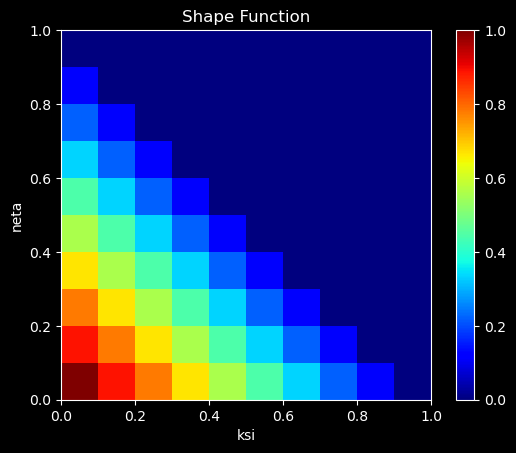

In [7]:

import numpy as np
class shape_fns:
    def __init__(self, p=0):
        self.p = p

    def gridnize(self, ksi, neta):
           ksi_, neta_ = np.meshgrid(ksi, neta, indexing='ij')
           return ksi_, neta_

    def expression(self, ksi, neta): 
        return np.where((ksi >= 0) & (neta >= 0) & (ksi + neta <= 1), 1-ksi-neta, 0)

    def __call__(self, x=0, y=0):
        x = np.asarray(x)  # convert x to a numpy array if it's not already
        y = np.asarray(y)  # convert y to a numpy array if it's not already
        ksi, neta = self.gridnize(x, y)
        print(ksi)
        return self.expression(ksi, neta)
import matplotlib.pyplot as plt

shape_fn = shape_fns()
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
output = shape_fn(x, y)

plt.imshow(output, origin='lower', extent=[0, 1, 0, 1], cmap='jet')
plt.colorbar()
plt.title('Shape Function')
plt.xlabel('ksi')
plt.ylabel('neta')
plt.show()


[0, 0] 0
[1, 0] 1
[0, 1] 2
False


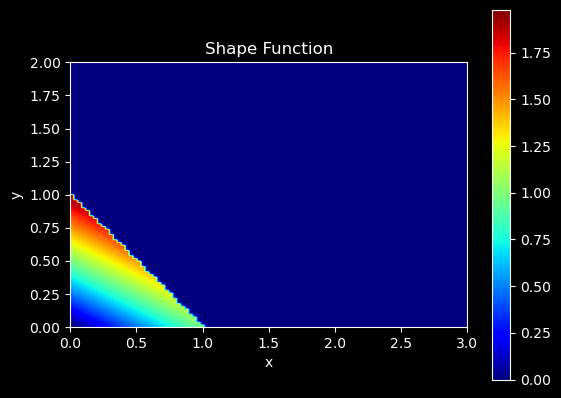

(100, 100)


In [51]:
from shape_fns import *
class Element:
    def __init__(self, nodes, id=0):
       
        self.id = id
        self.nodes = nodes
        self.n_nodes = len(self.nodes)
        self.vertices = []
        for Node in self.nodes:
            self.vertices.append(Node.xy)

        self.phis = [T3_phi([0, 1], [0, 1], p) for p in range(len(self.nodes))]

        self.neta = 1
        self.ksi = 1


    def in_element(self, point):
        count = 0
        polygon = np.array(self.vertices)
        n = len(polygon)
        for i in range(n):
            p1, p2 = polygon[i], polygon[(i + 1) % n]

            if np.all(p1 == point) or np.all(p2 == point):
                return True

            if p1[1] == p2[1]:
                if point[1] == p1[1] and min(p1[0], p2[0]) <= point[0] <= max(p1[0], p2[0]):
                    return True
            elif min(p1[1], p2[1]) <= point[1] < max(p1[1], p2[1]):
                x = (point[1] - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1]) + p1[0]  
                if x == point[0]:
                    return True
                elif x > point[0]:
                    count += 1
        return count % 2 == 1
    
    def __call__(self, x=0, y=0):
        
        if isinstance(x, (int, float)) and isinstance(y, (int, float)):
            # Deal with single numbers
            value = 0
            for i in range(len(self.nodes)):
                if self.in_element([x, y]):
                    value += self.nodes[i].value * self.phis[i](x, y)
            return value
        else:
            # Deal with arrays
            x = np.asarray(x)
            y = np.asarray(y)

            value = np.zeros((len(x), len(y)))
            for i in range(len(self.nodes)):
                for ix, x_val in enumerate(x):
                    for iy, y_val in enumerate(y):
                        if self.in_element([x_val, y_val]):
                            value[iy, ix] += self.nodes[i].value * self.phis[i](x_val, y_val)
            return value

vertices = [[0, 0], [1, 0], [0, 1]]
Node_list = []
for i in range(len(vertices)):
    node_this = Node(vertices[i], i)
    # node_this.value = np.random.choice([1, 0])
    node_this.value = i
    print(vertices[i], i)
    Node_list.append(node_this)
triangle = Element(Node_list)
x0, x1 = [0, 3]
y0, y1 = [0, 2]
x = np.linspace(x0, x1, 100)
y = np.linspace(y0, y1, 100)
output =triangle (x, y)
print(triangle.in_element([1.75, .01]))
# print(output)
plt.imshow(output, origin='lower', extent=[x0, x1, y0, y1], cmap='jet')
plt.colorbar()
plt.title('Shape Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(output.shape)

